# Retardo de grupo (Group delay)

In [243]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

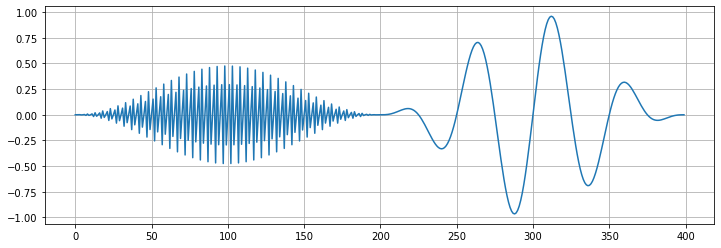

In [249]:
# Definiendo dos señales
w1 = 0.4 * 2*np.pi
w2 = 0.02 * 2*np.pi

N1 = 200
N2 = 200

A1 = 0.5
A2 = 1

x1 = A1*np.sin(w1*np.arange(N1))*np.hanning(N1)
x2 = A2*np.sin(w2*np.arange(N2))*np.hanning(N2)

x = np.concatenate((x1,x2))

fig = plt.figure(figsize=[12,4])
plt.plot(x)
plt.grid('on')

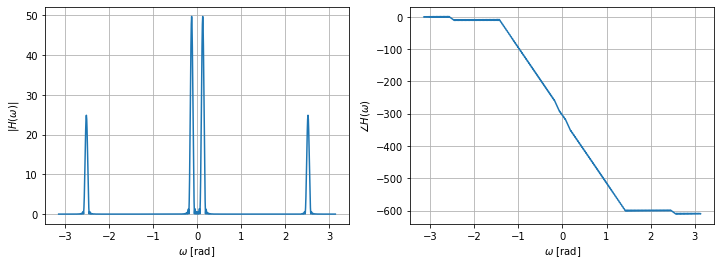

In [250]:
# Calculando la Transformada de Fourier
N = 2*(N1+N2)

Xw = np.fft.fft(x,N)
Xw = np.fft.fftshift(Xw)

w = (np.arange(N) - N/2)/N *(2*np.pi)

fig = plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(w,np.abs(Xw))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$|H(\omega)|$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(w,np.unwrap(np.angle(Xw)))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$\\angle H(\omega)$')
plt.grid('on')

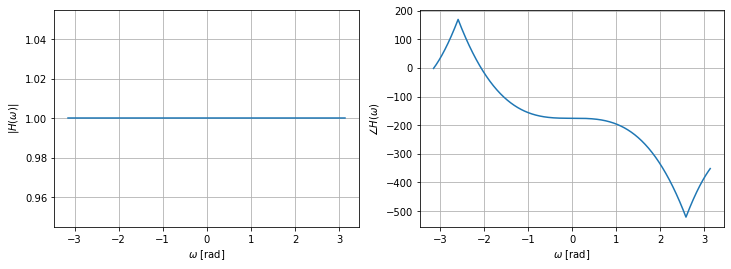

In [251]:
# Definiendo un filtro con fase no-lineal
Hw = np.exp(-1j*20*w**3)

fig = plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(w,np.abs(Hw))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$|H(\omega)|$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(w,np.unwrap(np.angle(Hw)))
#plt.plot(w,np.angle(Hw))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$\\angle H(\omega)$')
plt.grid('on')

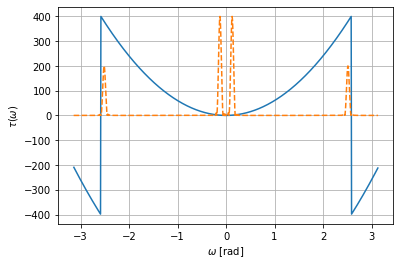

In [252]:
# Calculando retardo de grupo
dw = 1/N*(2*np.pi)
tau_w = -np.angle(Hw[1:N]/Hw[0:N-1])/dw
w1 = (w[0:N-1]+w[1:N])/2

fig = plt.figure()
plt.plot(w1,tau_w)
plt.plot(w,np.abs(Xw)*np.abs(np.max(tau_w)/np.max(np.abs(Xw))),'--')
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$\\tau(\omega)$')
plt.grid('on')


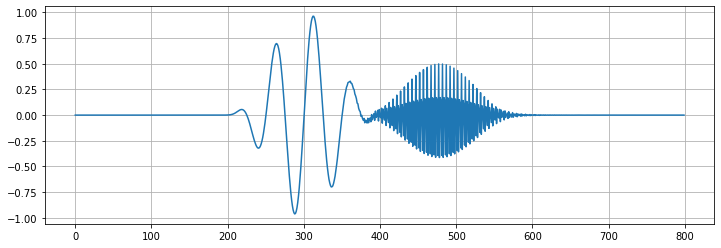

In [253]:
# Filtrando la señal
Yw = Hw * Xw
Yw = np.fft.ifftshift(Yw)
y = np.fft.ifft(Yw)

fig = plt.figure(figsize=[12,4])
plt.plot(np.real(y))
plt.grid('on')